In [10]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

import os
import cv2
import pandas as pd
import json
import numpy as np
import random
import torch
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.gridspec as gridspec

# ---- My utils ----
import sys
sys.path.insert( 0, '../' ) # To be able to access to utils
from models import *
from utils.train_arguments import *
from utils.utils_data import *
from utils.utils_training import *

In [71]:
def save_imgs(test_images, epoch=0, display=False, save=True, custom_name='samples', imgs_out_dir=""):
    fig=plt.figure(figsize = (50,50))
    gs1 = gridspec.GridSpec(1,5)
    gs1.update(wspace=0.05, hspace=0.05) # set the spacing between axes. 
    
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

    for i in range(len(test_images)):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        
        img = test_images[i]
        plt.imshow(img, cmap="gray")

    for ax, row in zip(axes[:], list(LABELS2TARGETS.keys())):
        print(row)
        ax.set_ylabel(row, rotation=0, size='large')
        
    if display: plt.show()
    if save:
        fig.savefig("{}.png".format(custom_name), bbox_inches='tight')
    plt.close()

In [67]:
train_aug = [
    transforms.ToPILImage(),  # because the input dtype is numpy.ndarray
    transforms.Resize((args.img_size, args.img_size)),
    transforms.RandomCrop((args.crop_size, args.crop_size)),
    transforms.RandomHorizontalFlip(0.5),  # because this method is used for PIL Image dtype
    transforms.RandomVerticalFlip(0.5),  # because this method is used for PIL Image dtype
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),  # because inpus dtype is PIL Image
]

In [4]:
train_aug = [
    transforms.ToPILImage(),  # because the input dtype is numpy.ndarray
    transforms.Resize((args.img_size, args.img_size)),
    transforms.CenterCrop((args.crop_size, args.crop_size)),
    transforms.ToTensor(),  # because inpus dtype is PIL Image
]

In [ ]:
val_aug = [
    transforms.ToPILImage(),  # because the input dtype is numpy.ndarray
    transforms.Resize((args.img_size, args.img_size)),
    transforms.CenterCrop((args.crop_size, args.crop_size)),
    transforms.ToTensor(),  # because inpus dtype is PIL Image
]

In [ ]:
if args.pretrained:
    train_aug.append(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))
    val_aug.append(transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]))

In [68]:
# data_partition='', data_augmentation=None, validation_size=0.15, seed=42
train_dataset = SIMEPU_Dataset(data_partition='train', transform=transforms.Compose(train_aug), validation_size=args.validation_size, binary_problem=args.binary_problem)
train_loader = DataLoader(train_dataset, batch_size=args.batch_size, pin_memory=True, shuffle=False)

In [69]:
xbatch, ybatch = next(iter(train_loader))

Text(0.5, 1.0, 'Parcheo')

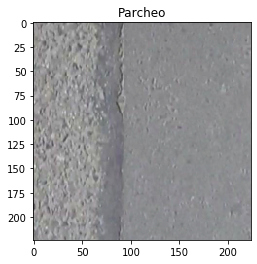

In [70]:
plt.imshow(xbatch[0].data.cpu().numpy().transpose(1,2,0))
plt.title(TARGETS2LABELS[ybatch[0].item()])

In [72]:
imgs = []
max_imgs = 5
for idx in range(max_imgs):
    imgs.append(xbatch[idx].data.cpu().numpy().transpose(1,2,0))
imgs_np = np.array(imgs)

Grietas longitudinales
Meteorización y desprendimiento
Grietas en forma de piel de cocodrilo
Sin daño
Parcheo


<Figure size 3600x3600 with 0 Axes>

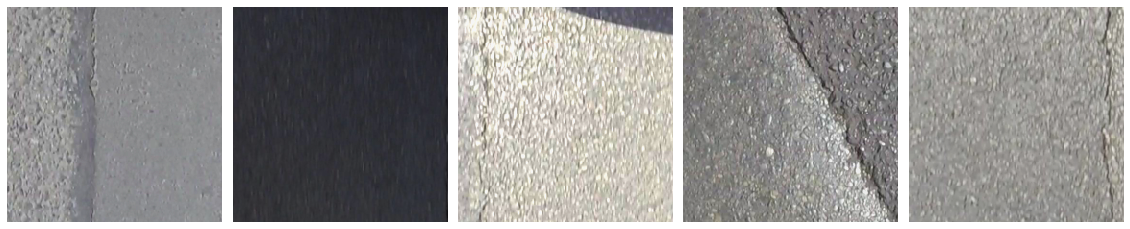

In [73]:
save_imgs(imgs, display=True, save=True, custom_name="AllDA")